In [2]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import rfft, rfftfreq
from scipy.signal import find_peaks

Matplotlib is building the font cache; this may take a moment.


In [4]:
with open('diode_digitizer_spills.pickle', 'rb') as f:
    data = pickle.load(f)
data.reset_index(drop=True, inplace=True)

In [5]:
for i in range(len(data)):
    print(np.count_nonzero(data.iloc[i].n_hits))

126
155
81
181
119
3026
1020
3374
2732
2568
7312
7006
6914
7251
6639


/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/eos/user/e/eljohnso/.local/lib/python3.9/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'CHIMERA Diode FFT')

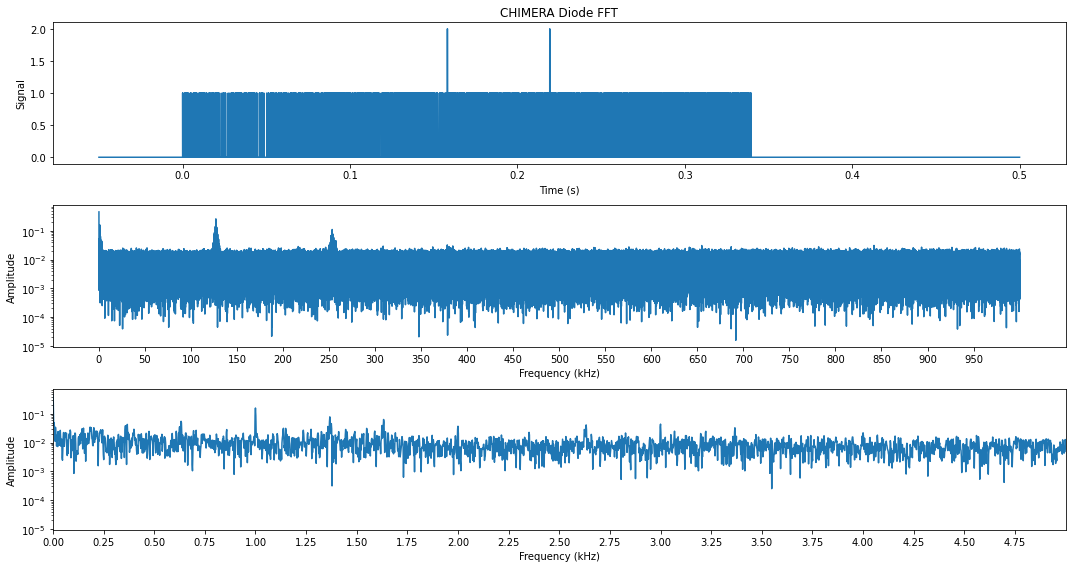

In [6]:
data_number = 5

# Open Data
t = data.time_series[data_number]
signal = data.n_hits[data_number]

# Mean time between acquisition
mean_time = np.diff(t).mean()

# Sampling frequency
fs = 1/ mean_time


# Number of samples
N = len(data.n_hits[0])

# Perform the FFT
number_of_hist = np.count_nonzero(data.iloc[i].n_hits)
fft = np.fft.rfft(signal)/number_of_hist # Normalize

# Frequency axis
freq = np.fft.rfftfreq(len(signal), t[1] - t[0])
freq = freq/1000

fig, ax = plt.subplots(3,1, figsize=(15, 8), tight_layout=True)

# Plot the signal and FFT
ax[0].plot(t, signal)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Signal')

ax[1].plot(freq, np.abs(fft)) # Divide by 1000 to have kHz instead of Hz


ax[1].set_xlabel('Frequency (kHz)')
ax[1].set_ylabel('Amplitude')
ax[1].set_yscale("log")
ax[1].set_xticks(np.arange(0,1000,50));
# ax[1].set_ylim(2e1, 2e3)


# With a zoom
ax[2].plot(freq, np.abs(fft)) # Divide by 1000 to have kHz instead of Hz
ax[2].set_xlabel('Frequency (kHz)')
ax[2].set_ylabel('Amplitude')
ax[2].set_yscale("log")

# Find the peaks
peaks = find_peaks(fft, height=2e2, distance = 50)
ax[2].scatter(np.take(freq, peaks[0])/1000, np.take(fft, peaks[0]), color="r", marker="x")


ax[2].set_xlim(0, 5)
ax[2].set_xticks(np.arange(0,5,0.25));
# ax[2].set_ylim(2e1, 2e3)

ax[0].set_title("CHIMERA Diode FFT")

# plt.savefig("CHIMERA_diode_FFT.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

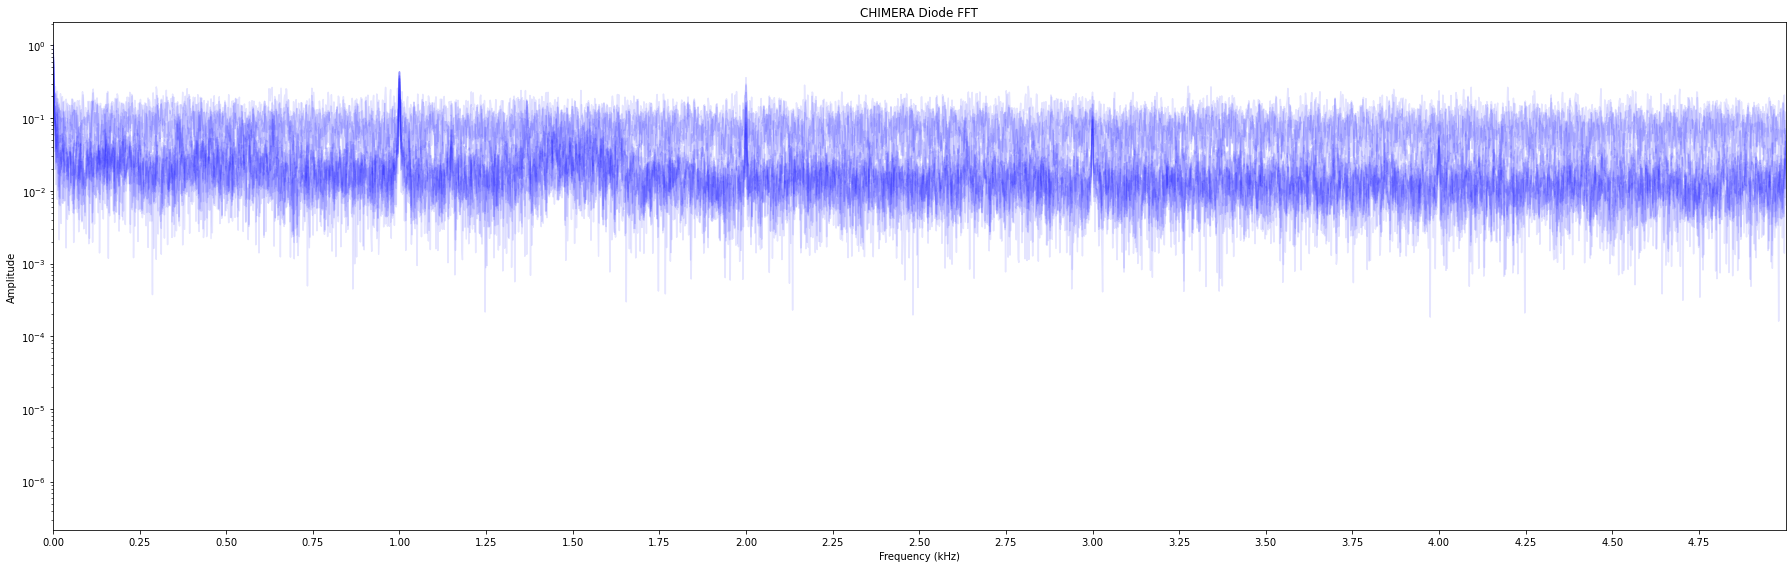

In [7]:
fig, ax = plt.subplots(figsize=(25, 8), tight_layout=True)

for i in range(len(data)):
    data_number = i

    # Open Data
    t = data.time_series[data_number]
    signal = data.n_hits[data_number]

    # Mean time between acquisition
    mean_time = np.diff(t).mean()

    # Sampling frequency
    fs = 1/ mean_time

    # Number of samples
    N = len(data.n_hits[0])

    # Perform the FFT
    number_of_hist = np.count_nonzero(data.iloc[i].n_hits)
    fft = np.fft.rfft(signal)/number_of_hist # Normalize

    # Frequency axis
    freq = np.fft.rfftfreq(len(signal), t[1] - t[0])

    # With a zoom
    ax.plot(freq/1000, np.abs(fft), color="b", alpha=0.1) # Divide by 1000 to have kHz instead of Hz
    ax.set_xlabel('Frequency (kHz)')
    ax.set_ylabel('Amplitude')
    ax.set_yscale("log")

    ax.set_xlim(0, 5)
    ax.set_xticks(np.arange(0,5,0.25));
    # ax[2].set_ylim(2e1, 2e3)

    ax.set_title("CHIMERA Diode FFT")

    # plt.savefig("CHIMERA_diode_FFT.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

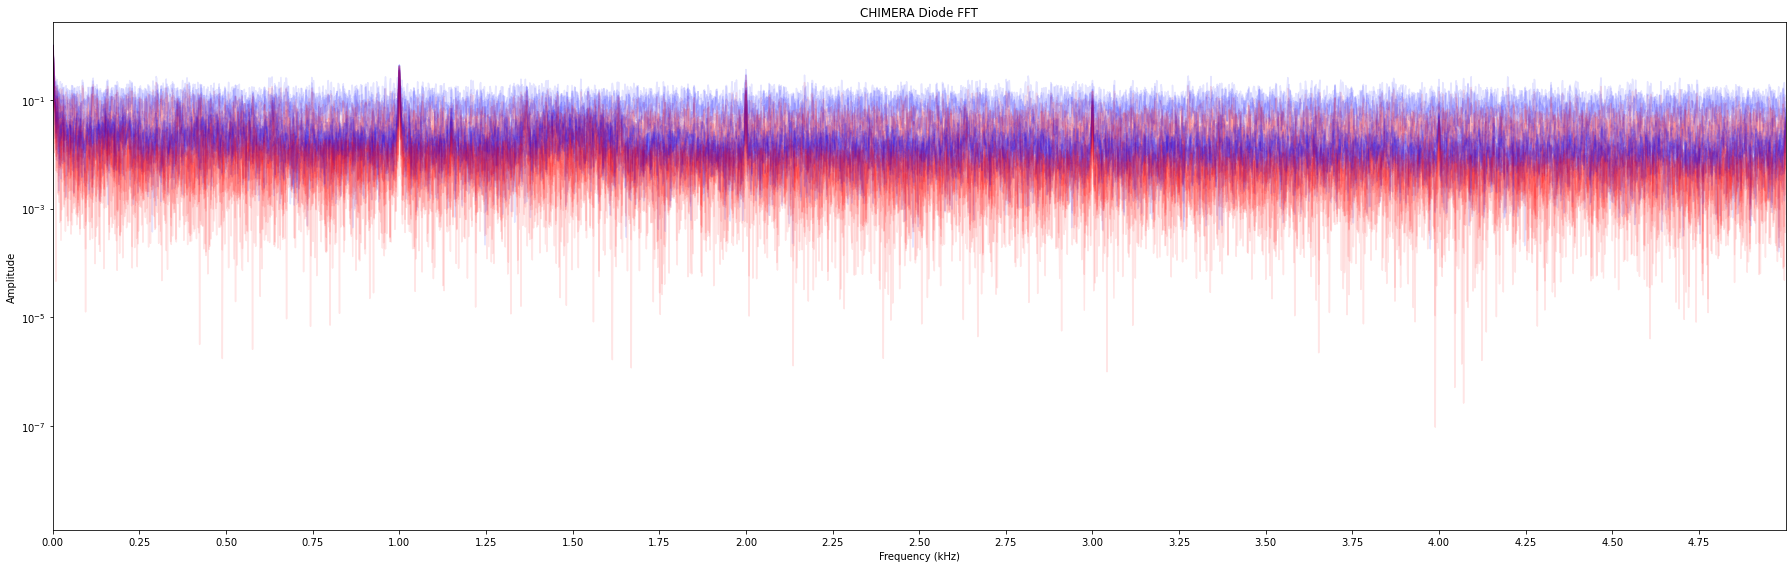

In [8]:
fig, ax = plt.subplots(figsize=(25, 8), tight_layout=True)

for i in range(len(data)):
    
    data_number = i

    # Open Data
    t = data.time_series[data_number]
    signal = data.n_hits[data_number]

    # Mean time between acquisition
    mean_time = np.diff(t).mean()

    # Sampling frequency
    fs = 1/ mean_time

    # Number of samples
    N = len(data.n_hits[0])

    # Perform the FFT
    number_of_hist = np.count_nonzero(data.iloc[i].n_hits)
    fft = np.fft.rfft(signal)/number_of_hist
    
    window_size = 1000
    fft_magnitude = np.abs(fft)
    rolling_average = np.convolve(fft_magnitude, np.ones(window_size) / window_size, mode='same')

    # Frequency axis
    freq = np.fft.rfftfreq(len(signal), t[1] - t[0])
    freq = freq/1000 # Divide by 1000 to have kHz instead of Hz

    # With a zoom
    ax.plot(freq, np.abs(fft), color="b", alpha=0.1) 
    ax.plot(freq, np.abs(fft_magnitude - rolling_average), color="r", alpha=0.1) 

    ax.set_xlabel('Frequency (kHz)')
    ax.set_ylabel('Amplitude')
    ax.set_yscale("log")

    ax.set_xlim(0, 5)
    ax.set_xticks(np.arange(0,5,0.25));
    # ax[2].set_ylim(2e1, 2e3)

    ax.set_title("CHIMERA Diode FFT")

    # plt.savefig("CHIMERA_diode_FFT.png", facecolor='white', transparent=False, dpi = 150, bbox_inches='tight')

Text(0.5, 1.0, 'CHIMERA Diode FFT\nEnergy = 650 MeV\nGain = 0.15')

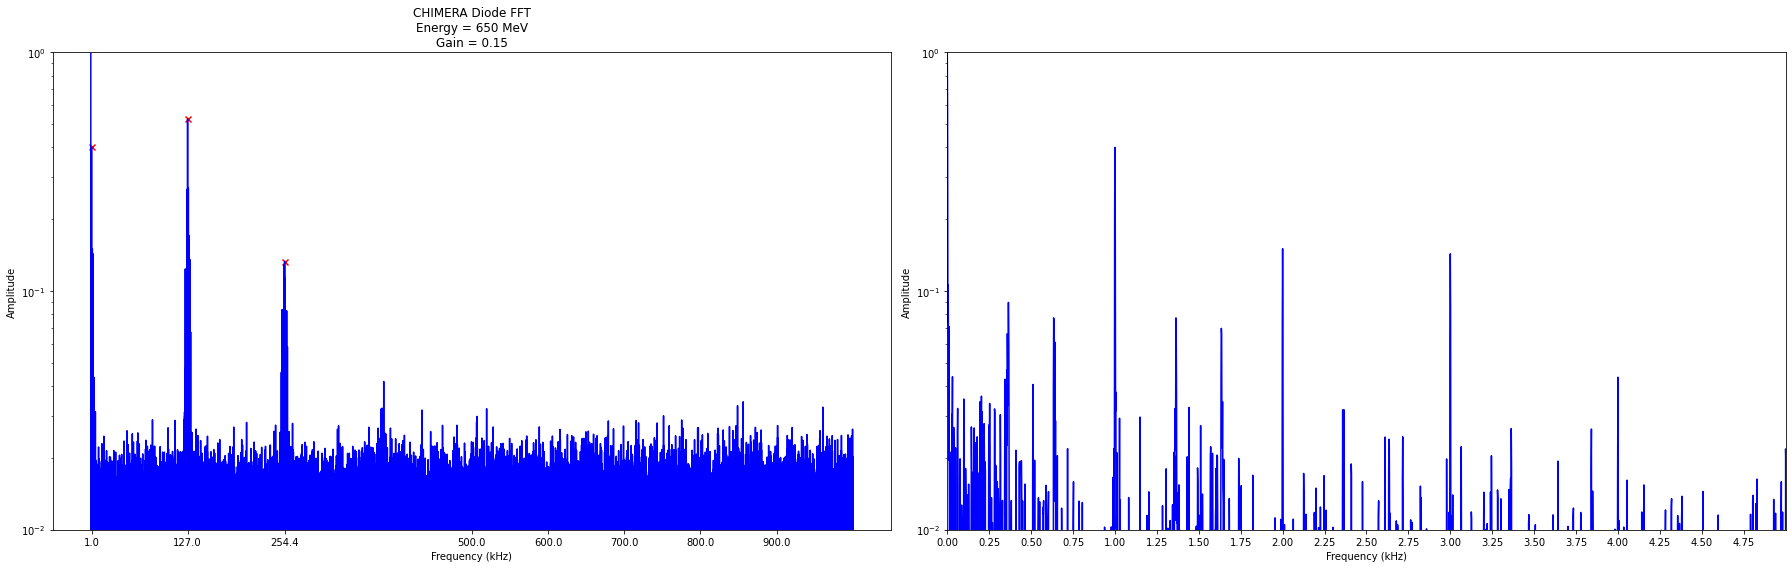

In [57]:
data_number = 14

fig, ax = plt.subplots(1,2, figsize=(25, 8), tight_layout=True)

# Open Data
t = data.time_series[data_number]
signal = data.n_hits[data_number]

# Mean time between acquisition
mean_time = np.diff(t).mean()

# Sampling frequency
fs = 1/ mean_time

# Number of samples
N = len(data.n_hits[0])

# Perform the FFT
number_of_hist = np.count_nonzero(data.iloc[i].n_hits)
fft = np.fft.rfft(signal)/number_of_hist

window_size = 1000
fft_magnitude = np.abs(fft)
rolling_average = np.convolve(fft_magnitude, np.ones(window_size) / window_size, mode='same')
fft_sub = fft_magnitude - rolling_average

# Frequency axis
freq = np.fft.rfftfreq(len(signal), t[1] - t[0])
freq = freq/1000 # Divide by 1000 to have kHz instead of Hz

# Whole range
ax[0].plot(freq, fft_sub, color="b", alpha=1.0) 


# Find the peaks
peaks = find_peaks(fft_sub, height=1e-1, distance = 2e3)
ax[0].scatter(np.take(freq, peaks[0]), np.take(fft_sub, peaks[0]), color="r", marker="x")

ax[0].set_xlabel('Frequency (kHz)')
ax[0].set_ylabel('Amplitude')
ax[0].set_yscale("log")
ax[0].set_ylim(1e-2, 1e0)

ax[0].set_xticks(np.concatenate([np.arange(500, 1000, 100), np.take(freq, peaks[0])]));


# With a zoom
ax[1].plot(freq, fft_magnitude - rolling_average, color="b", alpha=1.0) 

ax[1].set_xlabel('Frequency (kHz)')
ax[1].set_ylabel('Amplitude')
ax[1].set_yscale("log")
ax[1].set_xlim(0, 5)
ax[1].set_xticks(np.arange(0,5,0.25));
ax[1].set_ylim(1e-2, 1e0)

ax[0].set_title(f"CHIMERA Diode FFT\nEnergy = {data.loc[data_number].extracted_energy} MeV\nGain = {data.loc[data_number].rfko_gain}")